<a href="https://colab.research.google.com/github/Vihimuro/MDAEL8/blob/main/Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATENÇÃO! Caso esteja no GitHub, clique acima em Open in Colab para um experiência interativa e completa!

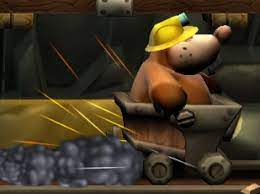

# Mineração de Dados


Alunos: Tiago Júnio Tegon Nascimento e Vinícius Himuro Augusto

Githubs: https://github.com/TiagoTegon/MDAEL8.git e https://github.com/Vihimuro/MDAEL8

Database escolhida: Congressional Voting Records Data Set

link: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

 # Atividade 1 - Pré-processamento de dados

## Avaliação das características

### Problema a ser investigado

A base de dados possui o posicionamento (a favor ou contra) de senadores sobre alguns assuntos politicos (atributos) e, a partir deles, identificar se uma pessoa analisada integra o partido republicano ou democrata.

Avalie as características da base de dados: problema a ser
investigado, número de amostras, número de atributos, tipos de
atributos, possui valores ausentes?

### Número de amostras

435 amostras, dos quais 267 são democratas e 168 republicanos.

### Atributos

São ao todo 17 atributos booleanos, sendo eles: 


   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
   10. mx-missile: 2 (y,n)
   11. immigration: 2 (y,n)
   12. synfuels-corporation-cutback: 2 (y,n)
   13. education-spending: 2 (y,n)
   14. superfund-right-to-sue: 2 (y,n)
   15. crime: 2 (y,n)
   16. duty-free-exports: 2 (y,n)
   17. export-administration-act-south-africa: 2 (y,n)

### Sobre valores ausentes


Analisando a base de dados, temos 288 dados definidos como '?', porém não são valores ausentes, e sim um posicionamento neutro sobre o atributo. Diante disso, foram cogitados 2 métodos para o tratamento desses valores: 

1- Criar uma terceira classificação denominada abstenção para cada atributo, além de sim e não.

2- Substituir esses valores a partir da moda da classe que a pessoa faz parte (republicano e democrata).

## Código

É necessário fazer o upload da base de dados. Para tal, realize os seguintes passos:

1- acesse https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

2- clique em data folder

3- clique em house-votes-84.data e baixe o arquivo

4- No notebook, clique em Arquivos na barra da esquerda

5- Em seguida, em Fazer upload para o armazenamento da função (1º ícone da esquerda para a direita)

6- Carregue o arquivo baixado 

Pronto! Podemos começar! 



Começando o código.

Github de referência: https://github.com/murilovarges/DataMiningSamples/blob/master/1-Preprocessing/DataCleaning.py

Fazendo os imports 

In [1]:
import pandas as pd
import numpy as np

Faz a leitura do arquivo

In [2]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
output_file_abstencao = '/content/house-votes-84-abstencao.data'
output_file_moda = '/content/house-votes-84-moda.data'
input_file = '/content/house-votes-84.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names,      # Nome das colunas 
                  usecols = features, # Define as colunas que serão  utilizadas
                  na_values='?')      # Define que ? será considerado valores ausentes
  

Mostrando os dados

In [3]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

PRIMEIRAS 15 LINHAS

    Class-Name handicapped-infants water-project-cost-sharing  \
0   republican                   n                          y   
1   republican                   n                          y   
2     democrat                 NaN                          y   
3     democrat                   n                          y   
4     democrat                   y                          y   
5     democrat                   n                          y   
6     democrat                   n                          y   
7   republican                   n                          y   
8   republican                   n                          y   
9     democrat                   y                          y   
10  republican                   n                          y   
11  republican                   n                          y   
12    democrat                   n                          y   
13    democrat                   y                          y   
14  

Alterando os dados dos atributos para valores numéricos

In [4]:
# republican => 0
df['Class-Name'] = df['Class-Name'].replace(['republican'],0)

# democrat => 1
df['Class-Name'] = df['Class-Name'].replace(['democrat'],1)

# n-> 0
df = df.replace(['n'],int(0))

# y-> 1
df = df.replace(['y'],int(1))

Para ver a mudança: 

In [5]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

PRIMEIRAS 15 LINHAS

    Class-Name  handicapped-infants  water-project-cost-sharing  \
0            0                  0.0                         1.0   
1            0                  0.0                         1.0   
2            1                  NaN                         1.0   
3            1                  0.0                         1.0   
4            1                  1.0                         1.0   
5            1                  0.0                         1.0   
6            1                  0.0                         1.0   
7            0                  0.0                         1.0   
8            0                  0.0                         1.0   
9            1                  1.0                         1.0   
10           0                  0.0                         1.0   
11           0                  0.0                         1.0   
12           1                  0.0                         1.0   
13           1                  1.0      

Imprimindo informações sobre os dados

In [6]:
# Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")

INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class-Name                              435 non-null    int64  
 1   handicapped-infants                     423 non-null    float64
 2   water-project-cost-sharing              387 non-null    float64
 3   adoption-of-the-budget-resolution       424 non-null    float64
 4   physician-fee-freeze                    424 non-null    float64
 5   el-salvador-aid                         420 non-null    float64
 6   religious-groups-in-schools             424 non-null    float64
 7   anti-satellite-test-ban                 421 non-null    float64
 8   aid-to-nicaraguan-contras               420 non-null    float64
 9   mx-missile                              413 non-null    float64
 10  immigration                     

In [7]:
# Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
print(df.describe())
print("\n")

DESCRIÇÃO DOS DADOS

       Class-Name  handicapped-infants  water-project-cost-sharing  \
count  435.000000           423.000000                  387.000000   
mean     0.613793             0.442080                    0.503876   
std      0.487440             0.497222                    0.500632   
min      0.000000             0.000000                    0.000000   
25%      0.000000             0.000000                    0.000000   
50%      1.000000             0.000000                    1.000000   
75%      1.000000             1.000000                    1.000000   
max      1.000000             1.000000                    1.000000   

       adoption-of-the-budget-resolution  physician-fee-freeze  \
count                         424.000000            424.000000   
mean                            0.596698              0.417453   
std                             0.491140              0.493721   
min                             0.000000              0.000000   
25%               

In [8]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")

VALORES FALTANTES

Class-Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64




Imprimindo colunas com valores ausentes

In [9]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'number' # number or median or mean or mode

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


Função para atualizar os valores ausentes para 2, usando o método de número


In [10]:
def UpdateMissingValues(df, column, method="number", number=2):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

Salvando um novo arquivo com a substituição para os dados faltantes. para visualizá-lo, atualize a parte de arquivos.


In [11]:
method = 'number' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method, 2)  

# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file_abstencao, header=False, index=False)  

# Atividade 2 - Redução e Transformação




- Utilize alguma técnica de normalização de dados;

- Utilize a técnica PCA e plot os dois principais componentes.

## Normalização de dados

###Código

Imports necessários

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Lendo o arquivo


In [13]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Separando as características do alvo

In [14]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Função para mostrar o dataframe

In [15]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n") 

Mostrando o dataframe

In [16]:
ShowInformationDataFrame(df,"Dataframe original")

Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class-Name                              435 non-null    int64  
 1   handicapped-infants                     435 non-null    float64
 2   water-project-cost-sharing              435 non-null    float64
 3   adoption-of-the-budget-resolution       435 non-null    float64
 4   physician-fee-freeze                    435 non-null    float64
 5   el-salvador-aid                         435 non-null    float64
 6   religious-groups-in-schools             435 non-null    float64
 7   anti-satellite-test-ban                 435 non-null    float64
 8   aid-to-nicaraguan-contras               435 non-null    float64
 9   mx-missile                              435 non-null    float64
 10  immigration                             43

Normalização com Z-score

In [17]:
# Z-score normalization
x_zcore = StandardScaler().fit_transform(x)
normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
normalized1Df = pd.concat([normalized1Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized1Df,"Dataframe Z-Score Normalized")

Dataframe Z-Score Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback    

Salvando a normalização

In [18]:
# Salva arquivo com o tratamento para dados faltantes
normalized1Df.to_csv('/content/house-votes-z-score.data', header=False, index=False) 

Normalização com Min-Max

In [19]:
# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized2Df,"Dataframe Min-Max Normalized")

Dataframe Min-Max Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback    

Salvando a normalização

In [20]:
# Salva arquivo com o tratamento para dados faltantes
normalized2Df.to_csv('/content/house-votes-min-max.data', header=False, index=False) 

##Redução de dados e PCA


###Código

Imports


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Para sem normalização

Lendo os arquivos


In [22]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [23]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

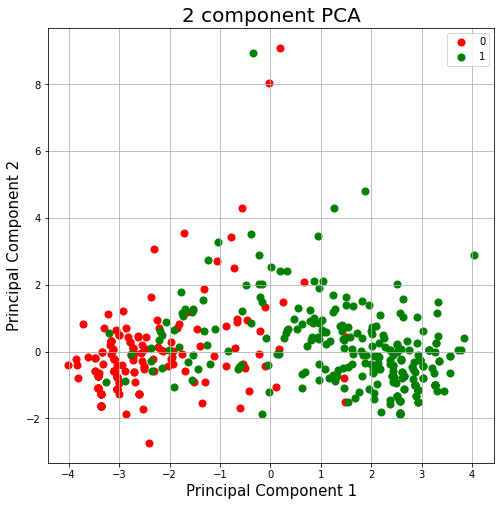

In [24]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com min-max

In [25]:
input_file = '/content/house-votes-min-max.data'
names = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','Class-Name']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [26]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

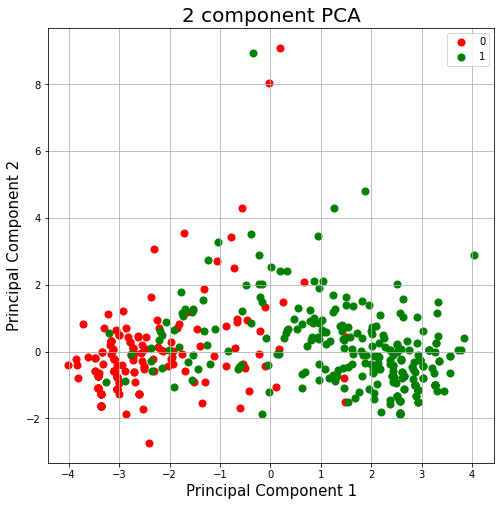

In [27]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com z-score

In [28]:
input_file = '/content/house-votes-z-score.data'
names = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','Class-Name']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [29]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

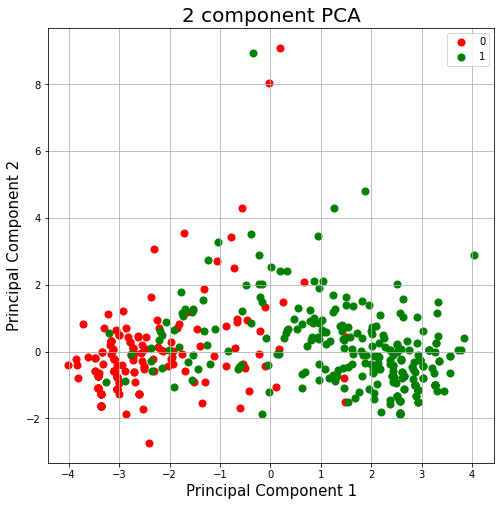

In [30]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Observando o PCA dos 3 casos, podemos notar que são idênticos, devido ao fato da base de dados já estar normalizada, por se tratar de 3 valores inteiros (0 -contra, 1- a favor e 2- absteve).

Também é possível notar uma separação entre 0 (vermelho/republicanos) e 1 (verde/ democratas) a partir do componente 1, sendo a maioria dos vermelhos com valores negativos e a maioria dos verdes com valores positivos.

#Atividade 3 - Análise Descritiva - Visualização dos Dados


O gráfico que melhor representa o conjunto de dados é o Gráfico de Setores. 
Foram construídos 3 gráficos (total de votos dos democratas, total de votos dos republicanos e total de votos no geral) para cada atributo (pauta).

### Código

In [31]:
import matplotlib.pyplot as plt

In [32]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Mostrando o número de republicanos e de democratas

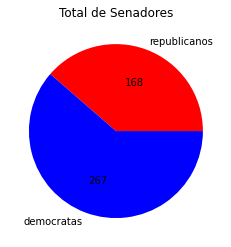

Total: 435

Republicanos: 38.62%

Democratas: 61.38



In [33]:
label = ['republicanos','democratas']
cores = ['r','b']
republicanos = df['Class-Name'].value_counts()[0]
democratas = df['Class-Name'].value_counts()[1]
total = republicanos + democratas
y = np.array([republicanos, democratas])
plt.pie(y , labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Total de Senadores')
plt.show() 
print("Total: {}\n".format(total) )
print("Republicanos: {:.2f}%\n".format((republicanos*100)/total))
print("Democratas: {:.2f}\n".format((democratas*100)/total))


Mostrando os votos a favor, contra e abstenção no geral para o atributo definido em 'atributo'

In [34]:
atributo = 'export-administration-act-south-africa'

#'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

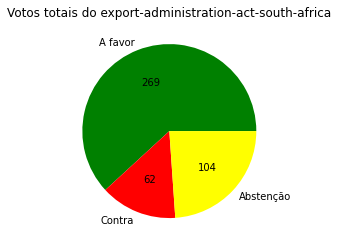

Total: 435
A favor: 61.84%
Contra: 14.25%
Abstenção: 23.91%


In [35]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = df[atributo].value_counts()[1]
contra = df[atributo].value_counts()[0]
abstencao = df[atributo].value_counts()[2]
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos totais do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Mostrando os votos a favor, contra e abstenção entre os republicanos

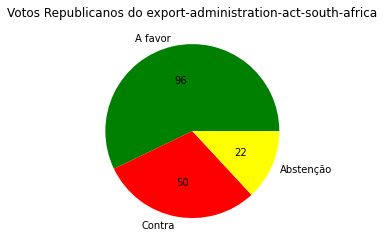

Total: 168
A favor: 57.14%
Contra: 29.76%
Abstenção: 13.10%


In [36]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = ((df['Class-Name'] == 0) & ((df[atributo]) == 1)).sum()
contra = ((df['Class-Name'] == 0) & ((df[atributo]) == 0)).sum()
abstencao = ((df['Class-Name'] == 0) & ((df[atributo]) == 2)).sum()
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos Republicanos do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Mostrando os votos a favor, contra e abstenção entre os democratas

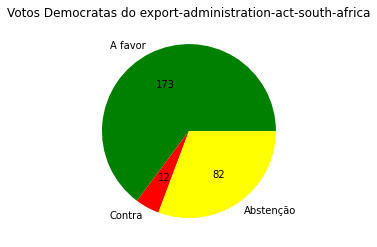

Total: 267
A favor: 64.79%
Contra: 4.49%
Abstenção: 30.71%


In [37]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = ((df['Class-Name'] == 1) & ((df[atributo]) == 1)).sum()
contra = ((df['Class-Name'] == 1) & ((df[atributo]) == 0)).sum()
abstencao = ((df['Class-Name'] == 1) & ((df[atributo]) == 2)).sum()
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos Democratas do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Analisando os gráficos, percebe-se que para:

//podemos padronizar por porcentagem exemplo 45-55%(dividido) 56-65% (maioria 1) 66-75% (maioria 2) 76-85% (maioria 3) +85% (maioria 4) 

**handicapped-infants:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 1 - a favor
    Total: dividido 

**water-project-cost-sharing:**

    Republicanos: dividido
    Democratas: dividido
    Total: dividido 

**adoption-of-the-budget-resolution:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 4 - a favor
    Total: maioria 1 - a favor

**physician-fee-freeze:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 4 - contra
    Total: maioria 1 - a favor


**el-salvador-aid:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 2 - contra
    Total: dividido

**religious-groups-in-schools:**

    Republicanos: maioria 4 - a favor
    Democratas: dividido
    Total: maioria 1 - a favor

**anti-satellite-test-ban:**

    Republicanos: maioria 2 - contra
    Democratas: maioria 2 - a favor
    Total: dividido 

**aid-to-nicaraguan-contras:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 3 - a favor
    Total: dividido 

**mx-missile:**

    Republicanos: maioria 4 - contra
    Democratas: maioria 2 - a favor
    Total: dividido 

**'immigration:**

    Republicanos: dividido
    Democratas: dividido
    Total: dividido 

**synfuels-corporation-cutback:**

    Republicanos: maioria 3 - contra
    Democratas: dividido
    Total: maioria 1 - contra

**education-spending:**

    Republicanos: maioria 3 - a favor
    Democratas: maioria 3 - contra
    Total: dividido 

**superfund-right-to-sue:**

    Republicanos: maioria 3 - a favor
    Democratas: maioria 2 - contra
    Total: dividido 

**crime:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 1 - contra
    Total: maioria 1 - a favor 

**duty-free-exports:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 1 - a favor
    Total: dividido 

**export-administration-act-south-africa:**

    Republicanos: maioria 1 - a favor
    Democratas: maioria 1 - a favor
    Total: maioria 1 - a favor
    obs: muita abstenção 





#Atividade 4 - Análise Descritiva - Medidas de Resumo

Aqui faremos medidas de resumo, como:
- Medidas de tendencia central;
- Medidas de dispersão;
- Medidas de posição relativa;
- Medidas de associação.

##Código

Lendo a Base de Dados

In [47]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Escolhendo o atributo

In [48]:
atributo = 'physician-fee-freeze'

# 'Class-Name', 'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

Medidas de Tendência Central

In [49]:
print("Medidas de Tendência Central\n")
print('Média: {:.2f}'.format(df[atributo].mean())) # Média
print('Mediana: {:.1f}'.format(df[atributo].median())) # Mediana
print('Ponto Médio: {:.0f}'.format((df[atributo].max() + df[atributo].min())/2)) # Ponto Médio
print('Moda: {:.0f}'.format(float(df[atributo].mode()))) # Moda

Medidas de Tendência Central

Média: 0.46
Mediana: 0.0
Ponto Médio: 1
Moda: 0


Medidas de Dispersão

In [50]:
print("Medidas de Dispersão\n")
print('Amplitude: {:.0f}'.format(df[atributo].max() - df[atributo].min()))  # Amplitude
print('Desvio padrão: {:.4f}'.format(df[atributo].std())) # Desvio padrão
print('Variância: {:.4f}'.format(df[atributo].var())) # Variância
print('Coeficiente de variação: {:.4f}'.format(df[atributo].std()/df[atributo].mean())) # Coeficiente de Variação

Medidas de Dispersão

Amplitude: 2
Desvio padrão: 0.5472
Variância: 0.2995
Coeficiente de variação: 1.1962


Medidas de Posição Relativa

In [51]:
print("\nMedidas de Posição Relativa\n")
print('Z Score:\n{}\n'.format((df[atributo] - df[atributo].mean())/df[atributo].std())) # Z Score
print('Quantil (25%): {}'.format(df[atributo].quantile(q=0.25))) # Quantil 25%
print('Quantil (50%): {}'.format(df[atributo].quantile(q=0.50))) # Quantil 50%
print('Quantil (75%): {}'.format(df[atributo].quantile(q=0.75))) # Quantil 75%


Medidas de Posição Relativa

Z Score:
0      0.991419
1      0.991419
2      2.818824
3     -0.835985
4     -0.835985
         ...   
430    0.991419
431   -0.835985
432    0.991419
433    0.991419
434    0.991419
Name: physician-fee-freeze, Length: 435, dtype: float64

Quantil (25%): 0.0
Quantil (50%): 0.0
Quantil (75%): 1.0


Medidas de Associação

In [52]:
print("\nMedidas de Associação\n")
print('Covariância: \n{}\n'.format(df.cov())) # Covariância
print('\nCorrelação: \n{}'.format(df.corr())) # Correlação


Medidas de Associação

Covariância: 
                                        Class-Name  handicapped-infants  \
Class-Name                                0.237597             0.102511   
handicapped-infants                       0.102511             0.305652   
water-project-cost-sharing               -0.006023             0.038821   
adoption-of-the-budget-resolution         0.175592             0.118915   
physician-fee-freeze                     -0.212315            -0.079554   
el-salvador-aid                          -0.160226            -0.081530   
religious-groups-in-schools              -0.090911            -0.086652   
anti-satellite-test-ban                   0.120086             0.107119   
aid-to-nicaraguan-contras                 0.136056             0.101531   
mx-missile                                0.165756             0.113481   
immigration                              -0.021135            -0.003602   
synfuels-corporation-cutback              0.080995            

Matriz de Correlação

In [53]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class-Name,1.000000,0.380395,-0.018560,0.676258,-0.795967,-0.584265,-0.358753,0.448214,0.506271,0.578097,-0.081648,0.283345,-0.536044,-0.443033,-0.538348,0.390387,0.342197
handicapped-infants,0.380395,1.000000,0.105481,0.403787,-0.262956,-0.262121,-0.301486,0.352507,0.333097,0.348948,-0.012268,0.148313,-0.219746,-0.227711,-0.261709,0.151937,0.263546
water-project-cost-sharing,-0.018560,0.105481,1.000000,0.039210,0.138366,0.136027,0.161946,-0.085728,0.000260,-0.087735,-0.070797,0.144949,0.044941,0.201329,0.020942,0.023271,0.118443
adoption-of-the-budget-resolution,0.676258,0.403787,0.039210,1.000000,-0.464820,-0.438152,-0.265103,0.473806,0.557397,0.539170,0.061886,0.233233,-0.388872,-0.302286,-0.431608,0.376696,0.378472
physician-fee-freeze,-0.795967,-0.262956,0.138366,-0.464820,1.000000,0.593434,0.417142,-0.437761,-0.438618,-0.521291,0.069629,-0.084972,0.500310,0.525364,0.539605,-0.302520,-0.290978
el-salvador-aid,-0.584265,-0.262121,0.136027,-0.438152,0.593434,1.000000,0.578565,-0.458529,-0.537219,-0.575354,0.054340,-0.005683,0.479885,0.479443,0.570132,-0.345728,-0.223701
religious-groups-in-schools,-0.358753,-0.301486,0.161946,-0.265103,0.417142,0.578565,1.000000,-0.334277,-0.336305,-0.404171,0.104758,0.115138,0.392973,0.467189,0.491298,-0.240875,-0.133403
anti-satellite-test-ban,0.448214,0.352507,-0.085728,0.473806,-0.437761,-0.458529,-0.334277,1.000000,0.631455,0.569680,0.101261,0.094013,-0.287939,-0.364813,-0.318505,0.434750,0.365231
aid-to-nicaraguan-contras,0.506271,0.333097,0.000260,0.557397,-0.438618,-0.537219,-0.336305,0.631455,1.000000,0.604281,0.072276,0.192023,-0.311607,-0.286561,-0.349530,0.456214,0.408703
mx-missile,0.578097,0.348948,-0.087735,0.539170,-0.521291,-0.575354,-0.404171,0.569680,0.604281,1.000000,0.083258,0.081582,-0.340548,-0.337433,-0.393975,0.390068,0.325532


Para Class-Name, desconsiderando sua relação com si mesma: 
- quanto mais próximo de 1, mais democrata a pauta é
- quanto mais próximo de -1, mais repubicana a pauta é,
- quanto mais próximo de 0, mais neutra ela é 
                  
Para o resto das relações, desconsiderando as mesmas relações:
- quanto mais próximo de 1, mais elas se parecem
- quanto mais próximo de -1, mais ela se parecem inversamente 
- quanto mais próximo de 0, menos elas se parecem

Gráfico de dispersão

In [54]:
atributo = 'el-salvador-aid'

# 'Class-Name', 'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

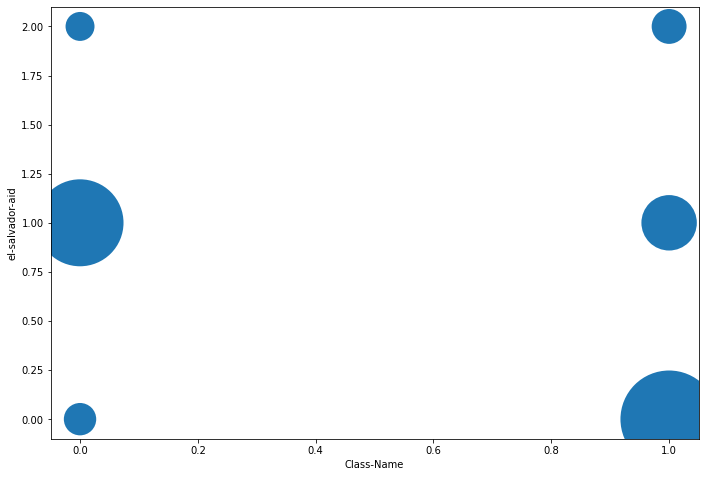

In [55]:
import seaborn as sns

df_dispersao =df[['Class-Name', atributo]]
df_dispersao = df_dispersao.groupby(['Class-Name',atributo]).size().reset_index(name="tamanho")
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax = sns.scatterplot(data=df_dispersao, x='Class-Name', y = atributo, size="tamanho", legend=False, sizes=(1000,10000))
plt.show()

Lembrete: 


Class-Name: 0- Republicano e 1- Democrata

Atributos: 0-contra, 1- a favor, 2 - abstenção


#Atividade 5 - Análise de Grupos

## Aplicando o algoritmo K-means

Importando as bibliotecas necessárias

In [57]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

Definindo a função K-means do zero.

In [85]:
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

Plotando os gráficos

In [86]:

def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)


Função main

In [58]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

[0.35837449 0.11090405]
(435, 2)
411.1564258698644
For n_clusters = 10, silhouette score is 0.5720113555893666)


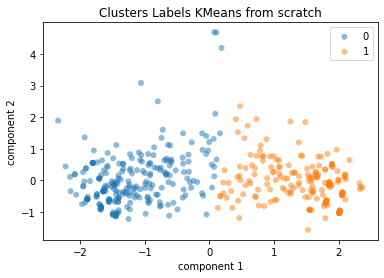

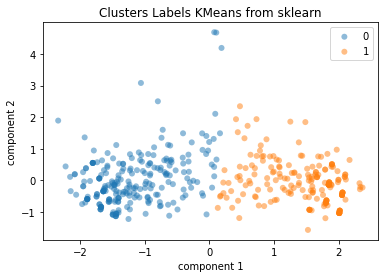

In [87]:
#Load dataset Digits
#show_digitsdataset(digits)

#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(df)
print(pca.explained_variance_ratio_)
#print(df.data.shape)
print(projected.shape)    
#plot_samples(projected, target, 'Original Labels')

#Applying our kmeans function from scratch
labels = KMeans_scratch(projected,2,5)

#Visualize the results 
plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

#Applying sklearn kemans function
kmeans = KMeans(n_clusters=2).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)    
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

plt.show()